Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

Do not edit or insert code into the test cells as all you insert will be overwritten by the automated testing code.

---

**Question 11**: Consider the one-dimensional, time-independent Schroedinger equation describing a particle with wave function $\psi(x)$ and energy $E$: $$-\frac{\hbar}{2\,m}\,\frac{d^{2}\psi(x)}{dx^{2}} + V(x)\,\psi(x) = E\,\psi(x).$$ Values for the constants $m$, $\hbar$ and others required for the calculation in SI units are given in the code cell below. (Note: the energy unit eV is taken as elementary charge $e$ times Volts with $e$ given as a constant.]

**Tasks**: 

**(a)** Consider a square potential well with $V(x)=0$ in between two infinitely high walls separated by a distance $L$ equal to the Bohr radius, i.e. for all x in the interval $[0,L]$. Write a function `solve(energy, func)` which takes the parameter energy and a python function $func$. This function should solve the Schroedinger ODE for the case described above and return only the final value of $\psi(L)$ at the boundary $L$. 

Write a function `eqn(y, x, energy)` containing the two first-order differential equations equivalent to the Schroedinger equation. Use this function as input for the `solve(energy, func)` function. This detailed naming scheme is required for the first tests of your code.

Write a script using the function `solve(energy, func)` to calculate the ground state energy of an electron in this potential well in units of eV (i.e. divide result by elementary charge value). For the initial condition, see technical hint below. For the number of values to solve for $\psi(x)$ the value 1000 is recommended. 

The result of your calculation should be a number between 134 eV and 135 eV. One of the tests will assess your `solve(energy, func)` function for a distorted potential well.

**(b)** Consider the harmonic potential $$V(x)=V_{0}\,x^{2}/a^{2},$$ where $V_{0}$ and $a=10^{-11}$ m are constants. Limit the infinite range of the variable $x$ to the interval $[-10a, 10a]$ with $V_{0}=50$ eV. The harmonic oscillator is known to have equidistant energy eigenvalues. Check that this is true, to the precision of your calculation, by calculating the ground state and the first 2 excited states. (Hint: the ground state has energy in the range 100 to 200 eV.)

In order to test your result, write a function `result()` which must return the difference of calculated energy eigenvalues in eV as a single number. Note that the test with the expected number is hidden and will test your result to a precision of $\pm{}1$ eV.

**(c)** Plot the normalized wavefunctions, for the ground state energy and the two excited state energies as obtained without normalization in part (b), in the interval $[-5a,5a]$. Note that normalization of a wavefunction requires the calculation of the integral of the square of the wavefunction $\int|\psi(x)|^{2}dx$ and subsequent division of $\psi(x)$ by the square root of the integral. 

Provide a plot title and appropriate axis labels, plot all three wavefunctions onto a single canvas using color-coded lines and also provide suitable axis limits in x and y to render all curves well visible. 

**Technical Hint**: This is not an initial value problem for the Schroedinger ODE but a boundary value problem! This requires additional effort, a different method to the previous ODE exercises and is hence an 'unseen' problem. 

Take a simple initial condition for both problems at $x_{0}=0$ or $x_{0}=-10a$, respectively: $\psi(x_{0})=0$ and $d\psi(x_{0})/dx=1$. Use that as a starting point to solve the ODE and vary the energy, $E$, until a solution converges. The task is to evaluate the variation of the energy variable until the second boundary condition (for instance at L for exercise (a)) is satisfied since the first boundary condition is already satisfied due to the choice of initial condition. 

This requires an initial guess for the energy interval in which the solution might be and a computational method for root finding. Search scipy for root finding methods and select one which does not require knowledge of the derivative. Root finding is appropriate here since the boundary condition to satisfy is $\psi(x)=0$ to a given precision. Another hint would be to consider the required precision since in SI units, absolute values for $E$ are very small indeed.

**Quantum physics background** For those lacking the first year quantum module, the boundary condition for both exercises is that $\psi(x)=0$ at each potential boundary. These are only fulfilled at specific, discrete energy values $E$, called energy eigenvalues, where the smallest of these is called the ground state energy.

In [1]:
import math

import numpy as np
from scipy.integrate import odeint
from scipy import optimize
from scipy.constants import physical_constants
import matplotlib.pyplot as plt

plt.style.use("seaborn")
# Required physical constants given in SI units.
m_el = physical_constants["electron mass"][0]
hbar = physical_constants["Planck constant over 2 pi"][0]
e_el = physical_constants["elementary charge"][0]
L_bohr = physical_constants["Bohr radius"][0]

lower_bound = 134 * e_el
upper_bound = 135 * e_el


def eqn(y, x, energy):
    """
    An function containing the two first-order differential equations
    equivalent to the Schroedinger equation for an infinite square potential.
    
    Parameters:
    -----------
    
    x: the value of x. Unused.
    
    y: np.ndarray of shape (2, 1) containing as y[0] and as y[1].
    
    energy: the value of E in the TISE.
    
    Returns:
    --------
    
    np.ndarray containing the values of the ODEs from given values.
    """
    f_0 = y[1]
    f_1 = energy * y[0] * 2 * m_el / (-(hbar ** 2))
    return np.array((f_0, f_1))


def solve(energy, func):
    """
    Solve the Schroedinger ODE and return ψ(L) at the boundary L.


    A function which takes the parameter energy and a python function
    as input, solves the Schroedinger ODE and returns only the final
    value of ψ(L) at the boundary L.
    
    Parameters:
    -----------
    
    energy: the value of energy in Joules to solve func for.
    
    func: the function to attempt to solve.
    
    Returns:
    --------
    
    last_solution: the last value of the solution, i.e. ψ(L)
    to create appropriate boundary conditions.
    
    See also:
    ---------
    
    eqn
    """
    init = np.array((0, 1))
    distance = np.linspace(0, L_bohr, 1000)
    solution = odeint(func, init, distance, args=(energy,))
    return solution[-1, 0]


ground_state_energy = (
    optimize.toms748(solve, lower_bound, upper_bound, args=(eqn,)) / e_el
)
print(ground_state_energy)

134.28282268054284


Ground state energy: 138.021eV
1st excited state energy: 414.064eV
2nd excited state energy: 690.107eV
3rd excited state energy: 966.150eV
4th excited state energy: 1242.193eV
5th excited state energy: 1518.236eV
Mean gap: 276.043eV


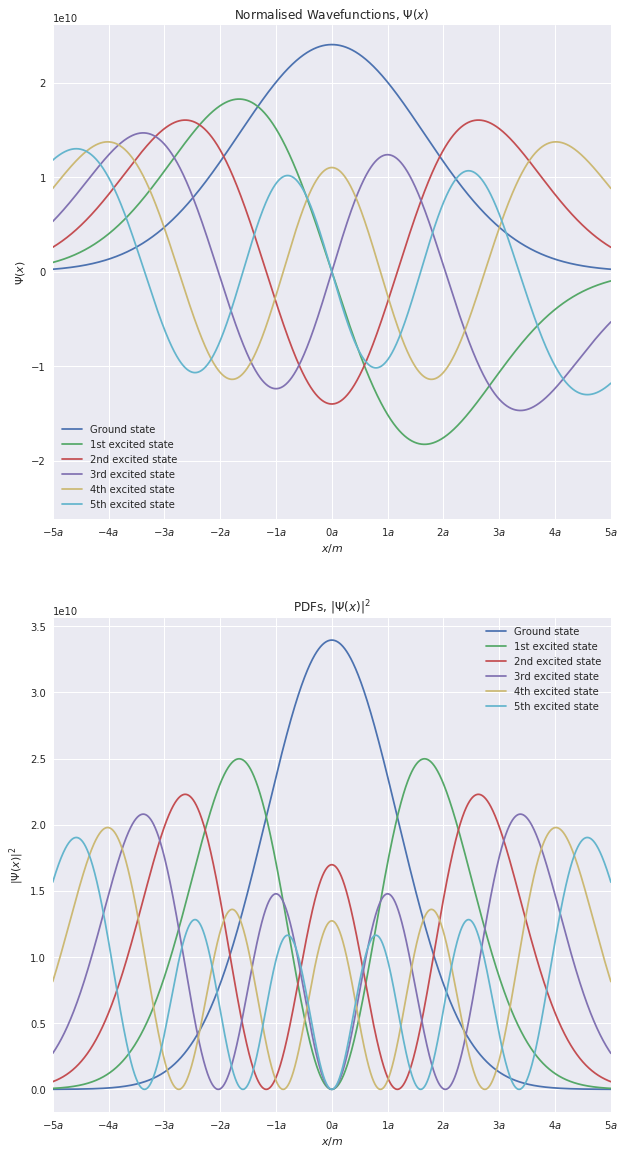

In [2]:
V_0 = 50 * e_el
a = 1e-11
x_range = np.linspace(-10 * a, 10 * a, 10000)
plotting_range = np.linspace(-5 * a, 5 * a, 10000)
x_ticks = np.linspace(-5, 5, 11)
x_tick_values = x_ticks * a
xlims = (min(plotting_range), max(plotting_range))


def eqn_harmonic(y, x, energy):
    """
    An function containing the two first-order differential equations
    equivalent to the Schroedinger equation for a harmonic potential.
    
    Parameters:
    -----------
    
    x: the value of x. Unused.
    
    y: np.ndarray of shape (2, 1) containing as y[0] and as y[1].
    
    energy: the value of E in the TISE.
    
    Returns:
    --------
    
    np.ndarray containing the values of the ODEs from given values.
    """
    f_0 = y[1]
    f_1 = (energy - V_0 * (x ** 2) / (a ** 2)) * y[0] * 2 * m_el / (-(hbar ** 2))
    return np.array((f_0, f_1))


def solve_harmonic_all(energy, func):
    """
    Solve the Schroedinger ODE and return ψ(L) at the boundary L.


    A function which takes the parameter energy and a python function
    as input, solves the Schroedinger ODE and returns only the final
    value of ψ(L) at the boundary L.
    
    Parameters:
    -----------
    
    energy: the value of energy in Joules to solve func for.
    
    func: the function to attempt to solve.
    
    Returns:
    --------
    
    last_solution: the last value of the solution, i.e. ψ(L)
    to create appropriate boundary conditions.
    
    See also:
    ---------
    
    eqn_harmonic
    """
    init = np.array((0, 1))
    solution = odeint(func, init, x_range, args=(energy,))
    return solution


def solve_harmonic(energy, func):
    """Wrapper for solve_harmonic_all that only returns last value."""
    return solve_harmonic_all(energy, func)[-1, 0]


def eigenvalue_energies(func):
    """Find the eigenvalue energies for a function func that
    describes the Schroedinger equation for some potential.
    
    Parameters:
    -----------
    
    func: the function containing the ODE form of the Schroedinger
    equation for some potential.
    
    Returns:
    --------
    
    zeroes: the eigenvalues found, in Joules, which correspond to
    the ground and excited states of the wavefunction.
    
    See also:
    ---------
    
    eqn_harmonic
    
    solve_harmonic
    """
    zeroes = []
    for i in range(0, 140 + 280 * 5):
        ith_level = i * e_el
        next_level = (i + 1) * e_el
        s_1 = np.sign(solve_harmonic(ith_level, func))
        s_2 = np.sign(solve_harmonic(next_level, func))
        if s_1 + s_2 == 0:
            zero = optimize.toms748(solve_harmonic, ith_level, next_level, args=(func,))
            zeroes.append(zero)
    return np.array(zeroes)


def result(func):
    """Wrapper for eigenvalue_energies that finds the mean different between
    eigenvalues in eV.
    """
    return np.mean(np.diff(eigenvalue_energies(func))) / e_el


def normalise_fn(yvals, xvals):
    """Normalise a given set of y values for given x values.
    
    Parameters:
    -----------
    
    yvals: iterable of numeric containing y values to normalise.
    
    xvals: iterable of numberic containing corresponding x values
    for each y value
    
    Returns:
    --------
    
    norm_curve: the normalised y values of the solved function.
    """
    return yvals / (np.trapz(np.abs(yvals), xvals))


def ordinal(n):
    """Return the ordinal number for an int n
    
    Parameters:
    -----------
    
    n: int number to get ordinal of.
    
    
    Returns:
    --------
    
    ord: str ordinal of the number in the form {digit}{suffix}.
    """
    return "{digit}{ord}".format(
        digit=n,
        ord="tsnrhtdd"[(math.floor(n / 10) % 10 != 1) * (n % 10 < 4) * n % 10 :: 4],
    )
    # the ordinal is calculated as follows
    # the slice generated is of the form [start::4]
    # in the string "tsnrhtdd" each suffix is separated by 4 characters
    # 4 characters because 4 suffixes, so they can be accessed by a single starting point
    # they are in the order th, st, nd, rd
    # so in the above slice, start should be:
    # - 0 if last digit >= 4
    # - 1 is last digit = 1, but last two not equal to 11
    # - 2 if last digit = 2, but last two not equal to 12
    # - 3 if last digit = 3, but last two not equal to 13
    #
    # math.floor(n/10) % 10 != 1
    # this calculates whether the last two digits are in 10-19
    # True - not a "teen", False - a "teen"
    # (n % 10 < 4)
    # this calculates whether the last digit is 0, 1, 2 or 3
    # True - ends 0, 1, 2, 3, False - doesn't
    # multiplying these is logical AND, but returns either 0 or 1
    # so 1 - not a teen that ends 0, 1, 2, 3
    # 0 - a teen or anything ending 4, 5, 6, 7, 8, 9
    # finally multiply by number % 10
    # if the number is not a teen and ends 0, 1, 2, 3
    # return the nth position as start, where n is 0, 1, 2 or 3
    # so 0 maps to "th", 1 maps to "st", etc.
    # else return 0 so "th"


eigenvalues = eigenvalue_energies(eqn_harmonic)
print(f"Ground state energy: {eigenvalues[0] / e_el:.3f}eV")
for i, energy in enumerate(eigenvalues[1:]):
    print(f"{ordinal(i + 1)} excited state energy: {energy / e_el:.3f}eV")
print(f"Mean gap: {result(eqn_harmonic):.3f}eV")
states = [solve_harmonic_all(eig, eqn_harmonic)[:, 0] for eig in eigenvalues]
normstates = [normalise_fn(yvals, x_range) for yvals in states]
sqstates = [normalise_fn(state ** 2, x_range) for state in normstates]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 20))
fig.patch.set_facecolor("white")
for i, curve in enumerate(normstates):
    if i == 0:
        label = "Ground state"
    else:
        label = f"{ordinal(i)} excited state"
    ax1.plot(x_range, curve, label=label)

ax1.set_title(r"Normalised Wavefunctions, $\Psi(x)$")
ax1.set_xlim(*xlims)
ax1.set_xticks(x_tick_values)
ax1.set_xticklabels([f"${i:.0f}a$" for i in x_ticks])
ax1.set_xlabel("$x / m$")
ylim = max(np.abs(ax1.get_ylim()))
ax1.set_ylim(-ylim, ylim)
ax1.set_ylabel("$\Psi(x)$")
ax1.legend()

for i, curve in enumerate(sqstates):
    if i == 0:
        label = "Ground state"
    else:
        label = f"{ordinal(i)} excited state"
    ax2.plot(x_range, curve, label=label)
ax2.set_title(r"PDFs, $|\Psi(x)|^2$")
ax2.set_xlim(*xlims)
ax2.set_xticks(x_tick_values)
ax2.set_xticklabels([f"${i:.0f}a$" for i in x_ticks])
ax2.set_xlabel("$x / m$")
ax2.legend()
ax2.set_ylabel("$|\Psi(x)|^2$")
plt.show()

In [3]:
# Test cell
value1 = solve(100 * e_el, eqn)
value2 = solve(200 * e_el, eqn)
assert (
    value1 > 8.1e-12 and value1 < 8.2e-12
), "wrong boundary value for Psi(x) at 100 eV."
assert (
    value2 > -8.9e-12 and value2 < -8.8e-12
), "wrong boundary value for Psi(x) at 200 eV."

In [4]:
# Hidden tests for (a), (b)

### Tests 4 marks; Style 1 mark; Plot - 4 marks